# import the important libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##  now lets read our data

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['internet_service.csv']))


Saving internet_service.csv to internet_service.csv


## lets see the data and understand it

In [ ]:
df.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,Gender,Location
0,15.0,1.0,0.0,11.95,25.0,0.14,0.0,8.4,2.3,0.0,M,Chicago
1,18.0,0.0,0.0,8.22,0.0,NaN,0.0,0.0,0.0,0.0,M,Chicago
2,23.0,1.0,0.0,8.91,16.0,0.00,0.0,13.7,0.9,0.0,M,Chicago
3,27.0,0.0,0.0,6.87,21.0,NaN,1.0,0.0,0.0,0.0,M,Chicago
4,34.0,0.0,0.0,6.39,0.0,NaN,0.0,0.0,0.0,0.0,M,Chicago
5,56.0,1.0,1.0,11.94,32.0,1.38,0.0,69.4,4.0,0.0,M,Chicago
6,71.0,0.0,0.0,8.96,18.0,0.00,0.0,21.3,2.0,0.0,M,Chicago
7,84.0,0.0,0.0,5.48,14.0,NaN,1.0,0.0,0.0,0.0,M,Chicago
8,94.0,0.0,0.0,8.54,0.0,NaN,0.0,0.0,0.0,0.0,M,Chicago
9,112.0,0.0,0.0,8.33,0.0,NaN,0.0,0.0,0.0,0.0,M,Chicago


# 1.arrange the data in good format
## 2.lets start the EDA

In [ ]:
df=df[['id','Gender','Location','is_tv_subscriber','is_movie_package_subscriber','subscription_age','bill_avg','reamining_contract','service_failure_count','download_avg','upload_avg','download_over_limit']]
df.head(10)

,id,Gender,Location,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,15.0,M,Chicago,1.0,0.0,11.95,25.0,0.14,0.0,8.4,2.3,0.0
1,18.0,M,Chicago,0.0,0.0,8.22,0.0,NaN,0.0,0.0,0.0,0.0
2,23.0,M,Chicago,1.0,0.0,8.91,16.0,0.00,0.0,13.7,0.9,0.0
3,27.0,M,Chicago,0.0,0.0,6.87,21.0,NaN,1.0,0.0,0.0,0.0
4,34.0,M,Chicago,0.0,0.0,6.39,0.0,NaN,0.0,0.0,0.0,0.0
5,56.0,M,Chicago,1.0,1.0,11.94,32.0,1.38,0.0,69.4,4.0,0.0
6,71.0,M,Chicago,0.0,0.0,8.96,18.0,0.00,0.0,21.3,2.0,0.0
7,84.0,M,Chicago,0.0,0.0,5.48,14.0,NaN,1.0,0.0,0.0,0.0
8,94.0,M,Chicago,0.0,0.0,8.54,0.0,NaN,0.0,0.0,0.0,0.0
9,112.0,M,Chicago,0.0,0.0,8.33,0.0,NaN,0.0,0.0,0.0,0.0


In [ ]:
df.tail(10)

,id,Gender,Location,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
52915,1240875.0,M,Chicago,1.0,1.0,1.82,12.0,0.15,0.0,38.9,3.8,0.0
52916,1240950.0,M,Chicago,1.0,0.0,1.82,12.0,0.16,1.0,154.0,6.5,0.0
52917,1240965.0,M,Chicago,1.0,0.0,0.62,18.0,0.00,0.0,7.6,0.3,0.0
52918,1240976.0,M,Chicago,1.0,0.0,1.82,13.0,0.13,0.0,86.9,6.1,0.0
52919,1241017.0,F,California,1.0,1.0,1.70,33.0,0.00,0.0,277.1,19.6,0.0
52920,1241018.0,M,Chicago,1.0,1.0,1.82,14.0,1.80,0.0,7.2,3.0,0.0
52921,1241019.0,M,California,1.0,1.0,1.82,42.0,0.16,0.0,22.3,0.9,0.0
52922,1241047.0,M,California,1.0,0.0,1.82,12.0,0.16,0.0,7.2,4.1,0.0
52923,1241143.0,F,Chicago,1.0,0.0,1.82,10.0,0.16,1.0,34.6,3.5,0.0
52924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(10)

,id,Gender,Location,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
11908,276909.0,F,California,1.0,0.0,0.53,10.0,1.44,5.0,0.0,0.0,0.0
46725,1094940.0,M,New York,1.0,0.0,0.79,25.0,0.00,1.0,36.0,3.7,0.0
23914,561214.0,M,New York,1.0,0.0,0.54,21.0,NaN,0.0,0.0,0.0,0.0
48481,1136827.0,M,California,1.0,0.0,2.27,27.0,NaN,0.0,59.2,1.9,0.0
41125,962532.0,M,California,1.0,0.0,3.11,12.0,0.83,0.0,54.0,2.4,0.0
16376,381595.0,M,California,1.0,0.0,2.48,0.0,NaN,0.0,24.8,3.3,0.0
10760,251405.0,F,Chicago,1.0,0.0,6.96,22.0,0.07,0.0,25.1,1.5,0.0
20191,471799.0,F,California,1.0,0.0,6.12,20.0,0.98,0.0,67.9,6.8,0.0
22456,526001.0,M,California,1.0,0.0,2.75,20.0,NaN,1.0,24.2,0.8,0.0
20531,479529.0,F,Washington DC,1.0,1.0,6.10,18.0,1.76,1.0,90.1,10.2,0.0


In [ ]:
df.columns

Index(['id', 'Gender', 'Location', 'is_tv_subscriber',
       'is_movie_package_subscriber', 'subscription_age', 'bill_avg',
       'reamining_contract', 'service_failure_count', 'download_avg',
       'upload_avg', 'download_over_limit'],
      dtype='object')

In [ ]:
df.shape

(52925, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52925 entries, 0 to 52924
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           52924 non-null  float64
 1   Gender                       52924 non-null  object 
 2   Location                     52924 non-null  object 
 3   is_tv_subscriber             52924 non-null  float64
 4   is_movie_package_subscriber  52924 non-null  float64
 5   subscription_age             52924 non-null  float64
 6   bill_avg                     52924 non-null  float64
 7   reamining_contract           32473 non-null  float64
 8   service_failure_count        52924 non-null  float64
 9   download_avg                 52849 non-null  float64
 10  upload_avg                   52849 non-null  float64
 11  download_over_limit          52924 non-null  float64
dtypes: float64(10), object(2)
memory usage: 4.8+ MB


## describe funcation is for statistics calculation
### for two types (float and int)

In [ ]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,5.292400e+04,52924.000000,52924.000000,52924.000000,52924.000000,32473.000000,52924.000000,52849.000000,52849.000000,52924.000000
mean,6.197780e+05,0.771880,0.302018,3.040503,19.205502,0.560731,0.281819,37.803771,3.711054,0.277077
std,3.589071e+05,0.419624,0.459137,2.061247,12.784730,0.689250,0.828325,57.396137,9.457245,1.149575
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.079468e+05,1.000000,0.000000,1.680000,13.000000,0.000000,0.000000,2.700000,0.200000,0.000000
50%,6.204820e+05,1.000000,0.000000,2.530000,20.000000,0.090000,0.000000,20.400000,1.600000,0.000000
75%,9.293675e+05,1.000000,1.000000,4.060000,23.000000,1.140000,0.000000,52.900000,4.200000,0.000000
max,1.241143e+06,1.000000,1.000000,12.800000,406.000000,2.780000,19.000000,3179.800000,453.300000,7.000000


## what about non numarical values?

In [ ]:
df.describe(include=["object"])

,Gender,Location
count,52924,52924
unique,2,5
top,F,Chicago
freq,33007,18380


# now lets check somethings after we understand the data
## 1-the missing values
## 2-the number fo duplicates

In [ ]:
df.isnull().sum()

id                                 1
Gender                             1
Location                           1
is_tv_subscriber                   1
is_movie_package_subscriber        1
subscription_age                   1
bill_avg                           1
reamining_contract             20452
service_failure_count              1
download_avg                      76
upload_avg                        76
download_over_limit                1
dtype: int64

In [ ]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

# now lets handle them

### deleting the last raw which all values are nan

In [ ]:
df=df.drop(df.index[-1])
df.tail(5)

,id,Gender,Location,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
52919,1241017.0,F,California,1.0,1.0,1.70,33.0,0.00,0.0,277.1,19.6,0.0
52920,1241018.0,M,Chicago,1.0,1.0,1.82,14.0,1.80,0.0,7.2,3.0,0.0
52921,1241019.0,M,California,1.0,1.0,1.82,42.0,0.16,0.0,22.3,0.9,0.0
52922,1241047.0,M,California,1.0,0.0,1.82,12.0,0.16,0.0,7.2,4.1,0.0
52923,1241143.0,F,Chicago,1.0,0.0,1.82,10.0,0.16,1.0,34.6,3.5,0.0


In [ ]:
df['reamining_contract']=df['reamining_contract'].fillna("NO CONTRACT")
df.head(10)


,id,Gender,Location,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,15.0,M,Chicago,1.0,0.0,11.95,25.0,0.14,0.0,8.4,2.3,0.0
1,18.0,M,Chicago,0.0,0.0,8.22,0.0,NO CONTRACT,0.0,0.0,0.0,0.0
2,23.0,M,Chicago,1.0,0.0,8.91,16.0,0.0,0.0,13.7,0.9,0.0
3,27.0,M,Chicago,0.0,0.0,6.87,21.0,NO CONTRACT,1.0,0.0,0.0,0.0
4,34.0,M,Chicago,0.0,0.0,6.39,0.0,NO CONTRACT,0.0,0.0,0.0,0.0
5,56.0,M,Chicago,1.0,1.0,11.94,32.0,1.38,0.0,69.4,4.0,0.0
6,71.0,M,Chicago,0.0,0.0,8.96,18.0,0.0,0.0,21.3,2.0,0.0
7,84.0,M,Chicago,0.0,0.0,5.48,14.0,NO CONTRACT,1.0,0.0,0.0,0.0
8,94.0,M,Chicago,0.0,0.0,8.54,0.0,NO CONTRACT,0.0,0.0,0.0,0.0
9,112.0,M,Chicago,0.0,0.0,8.33,0.0,NO CONTRACT,0.0,0.0,0.0,0.0


In [ ]:
df['download_avg']=df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg']=df['upload_avg'].fillna(df['upload_avg'].mean())

In [ ]:
null_percentage = df.isnull().mean() * 100
null_percentage = null_percentage.round(2)

null_percentage

id                             0.0
Gender                         0.0
Location                       0.0
is_tv_subscriber               0.0
is_movie_package_subscriber    0.0
subscription_age               0.0
bill_avg                       0.0
reamining_contract             0.0
service_failure_count          0.0
download_avg                   0.0
upload_avg                     0.0
download_over_limit            0.0
dtype: float64

## now lets change some data types

In [ ]:
df=df.astype({"id":"int",
             "is_tv_subscriber":"bool",
             "is_movie_package_subscriber":"bool",
             "service_failure_count":"int"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           52924 non-null  int32  
 1   Gender                       52924 non-null  object 
 2   Location                     52924 non-null  object 
 3   is_tv_subscriber             52924 non-null  bool   
 4   is_movie_package_subscriber  52924 non-null  bool   
 5   subscription_age             52924 non-null  float64
 6   bill_avg                     52924 non-null  float64
 7   reamining_contract           52924 non-null  object 
 8   service_failure_count        52924 non-null  int32  
 9   download_avg                 52924 non-null  float64
 10  upload_avg                   52924 non-null  float64
 11  download_over_limit          52924 non-null  float64
dtypes: bool(2), float64(5), int32(2), object(3)
memory usage: 3.7+ MB


Gender
F    33007
M    19917
Name: count, dtype: int64
Location
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: count, dtype: int64


<ipython-input-5-cb0e131dac2a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df , width=0.5 , palette={'M': 'blue', 'F': 'pink'})


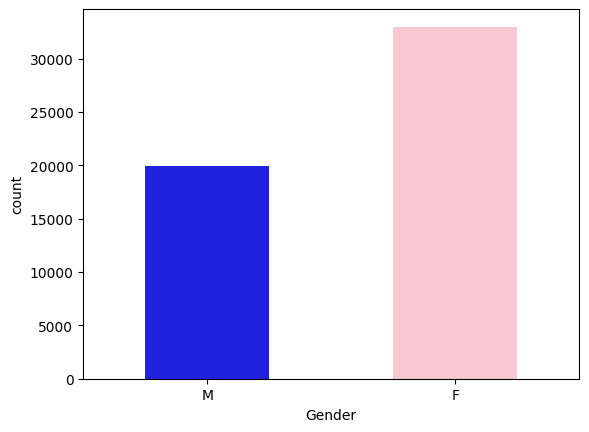

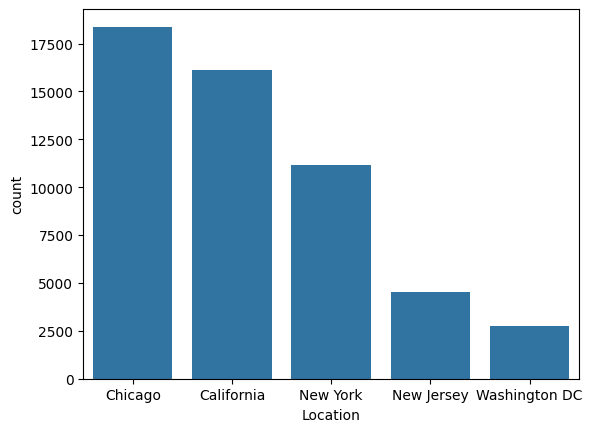

In [ ]:
print(df['Gender'].value_counts())
print(df['Location'].value_counts())


sns.countplot(x='Gender', data=df , width=0.5 , palette={'M': 'blue', 'F': 'pink'})
plt.show()

sns.countplot(x='Location', data=df)
plt.show()

# Distribution of **TV** **Subscribers**

<ipython-input-113-3182038d2611>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_tv_subscriber', data=df, palette=['red', 'blue'], width=0.5)


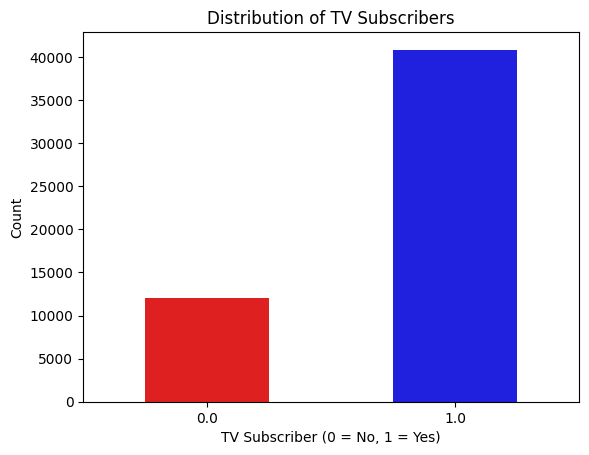

In [ ]:
sns.countplot(x='is_tv_subscriber', data=df, palette=['red', 'blue'], width=0.5)

plt.title('Distribution of TV Subscribers')
plt.xlabel('TV Subscriber (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Distribution of **Movie** **Package** **Subscribers**

<ipython-input-114-251f95726649>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_movie_package_subscriber', data=df, palette=['red', 'blue'], width=0.5)


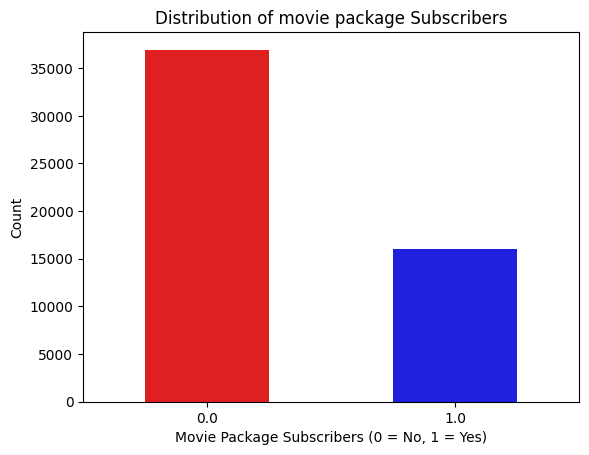

In [ ]:

sns.countplot(x='is_movie_package_subscriber', data=df, palette=['red', 'blue'], width=0.5)

plt.title('Distribution of movie package Subscribers')
plt.xlabel('Movie Package Subscribers (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# 1️ - Histogram for **Subscription** **Age**

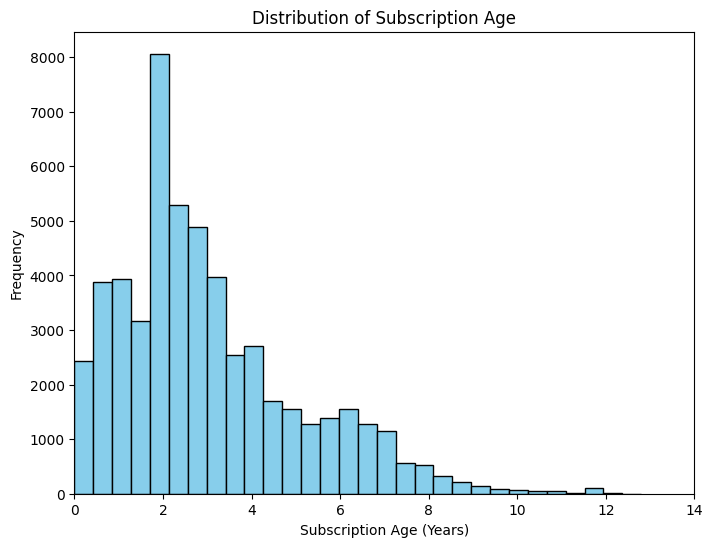

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['subscription_age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Subscription Age')
plt.xlabel('Subscription Age (Years)')
plt.ylabel('Frequency')
plt.xlim(0, 14)
plt.show()



# 2️ - Histogram for **Average** **Bill** **Amount**


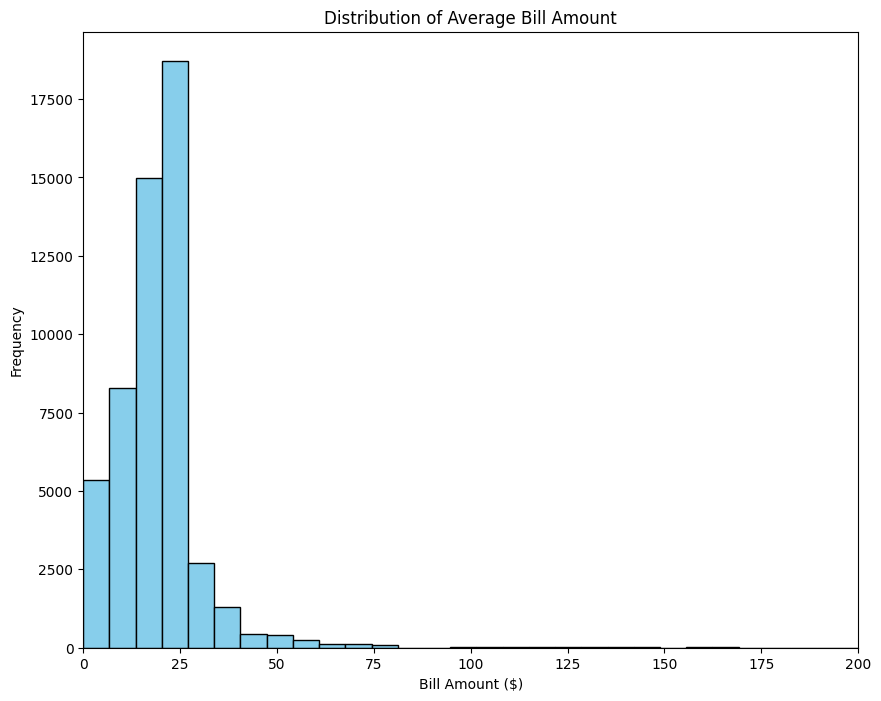

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df['bill_avg'].dropna(), bins=60, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Bill Amount')
plt.xlabel('Bill Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.show()


# 3️ - Histogram for **Remaining** **Contract** **Duration**


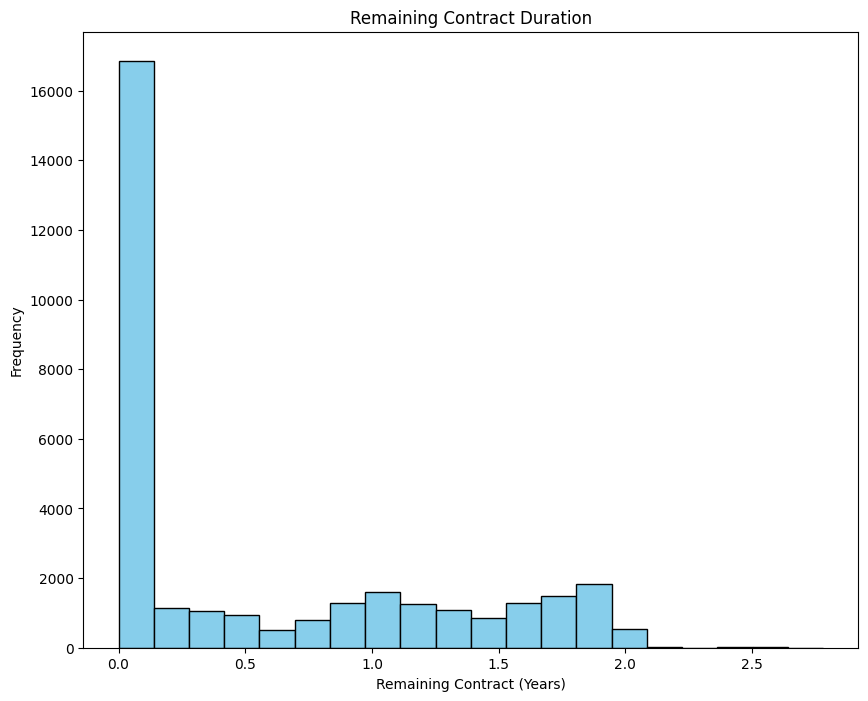

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df['reamining_contract'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Remaining Contract Duration')
plt.xlabel('Remaining Contract (Years)')
plt.ylabel('Frequency')
plt.show()


# 4️ - Histogram for **Service** **Failure** **Count**


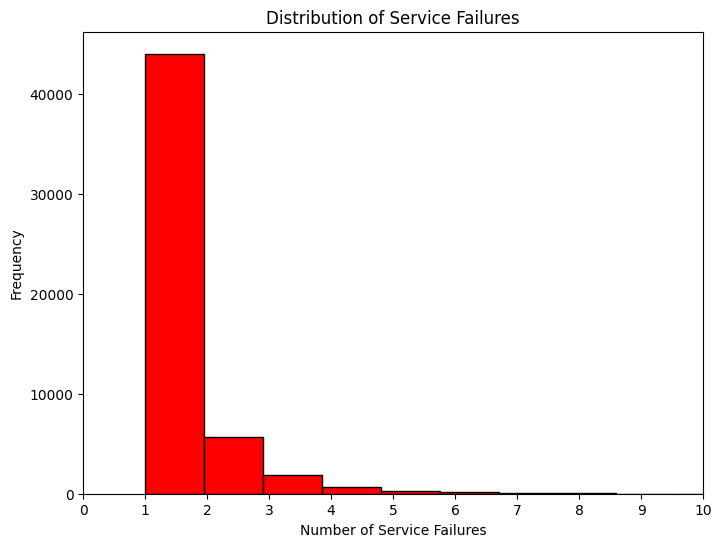

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['service_failure_count'].dropna(), bins=20, color='red', edgecolor='black')

plt.title('Distribution of Service Failures')
plt.xlabel('Number of Service Failures')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, df['service_failure_count'].max() + 1, 1))
plt.xlim(0, 10)
plt.show()


# 5️ - Histogram for **Average** **Download** **Speed**


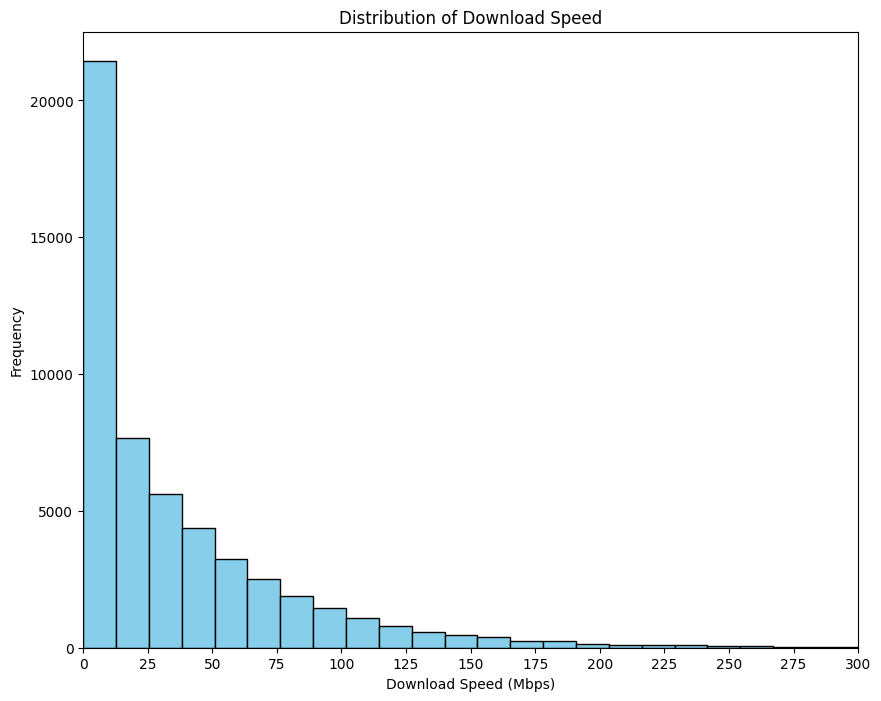

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df['download_avg'].dropna(), bins=250, color='skyblue', edgecolor='black')
plt.title('Distribution of Download Speed')
plt.xlabel('Download Speed (Mbps)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, df['download_avg'].max() + 25, 25))

plt.xlim(0, 300)
plt.show()


# 6️ - Histogram for **Average** **Upload** **Speed**


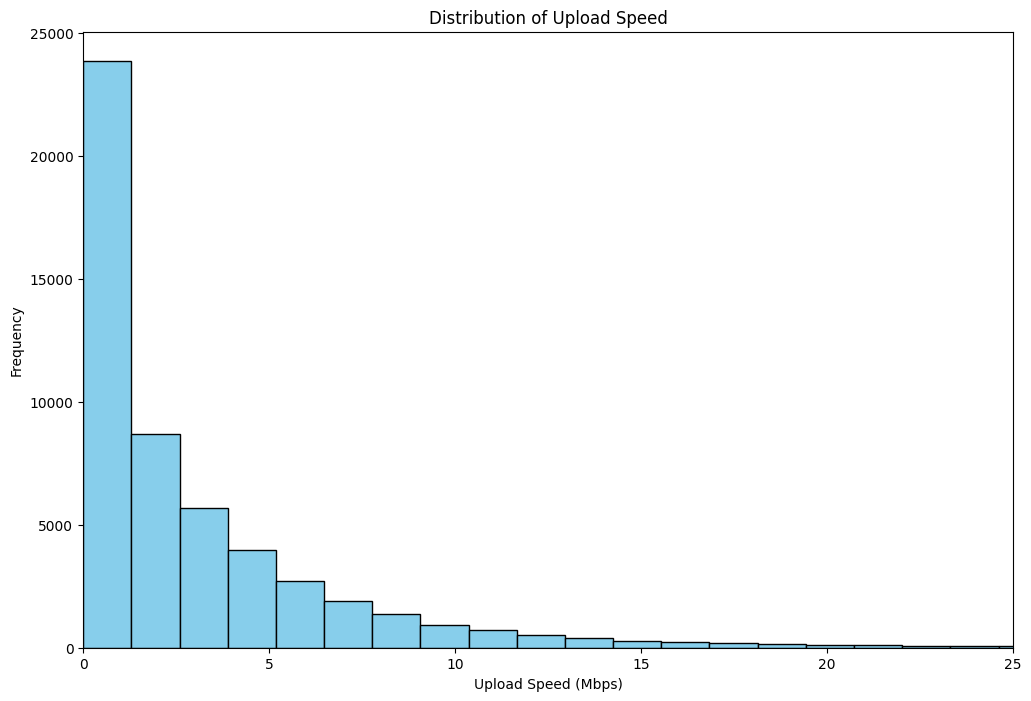

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(df['upload_avg'].dropna(), bins=350, color='skyblue', edgecolor='black')
plt.title('Distribution of Upload Speed')
plt.xlabel('Upload Speed (Mbps)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, df['download_avg'].max() + 5, 5))
plt.xlim(0, 25)

plt.show()


# 7 - Histogram for **Download** **Over** **Limit**

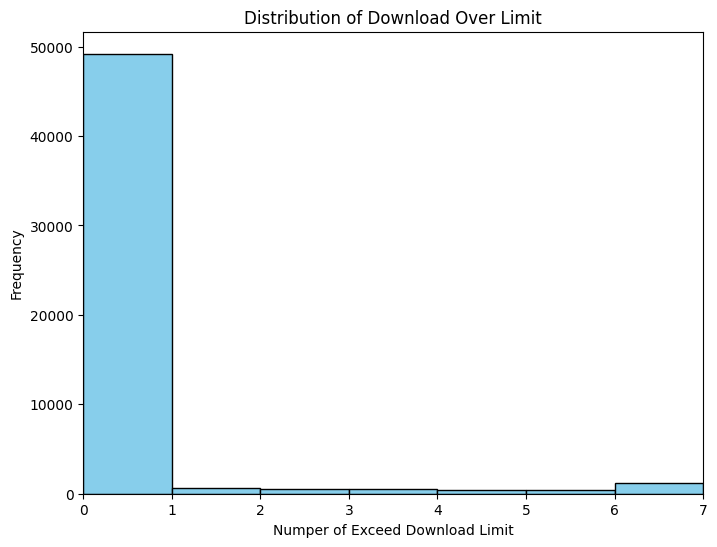

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['download_over_limit'].dropna(), bins=7, color='skyblue', edgecolor='black')
plt.title('Distribution of Download Over Limit')
plt.xlabel('Numper of Exceed Download Limit')
plt.ylabel('Frequency')
plt.xlim(0, 7)
plt.show()